In [33]:
import pandas as pd
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline
# tells python to actually display the graphs

In [34]:
auto = pd.read_csv('Automobile.csv')

In [3]:
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [66]:
print(auto.columns)
print(auto.dtypes)
print(auto.number_of_doors.value_counts())
print(count for count in auto.columns)
check = auto.columns
for i in check:
    if auto[i].dtype == 'object':

        print(auto[str(i)].value_counts())

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'number_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')
symboling                int64
normalized_losses        int64
make                    object
fuel_type               object
aspiration              object
number_of_doors         object
body_style              object
drive_wheels            object
engine_location         object
wheel_base             float64
length                 float64
width                  float64
height                 float64
curb_weight              int64
engine_type             object
number_of_cylinders     object
engine_size              int64
fuel_system             object
bore         

In [44]:
# create a Dataframe
df = pd.DataFrame({ 
  'height' : [165, 165, 164, 
              158, 167, 160,
              158, 165],
    
  'weight' : [63.5, 64, 63.5,
              54, 63.5, 62,
              64, 64],
    
  'age' : [20, 22, 22, 
           21, 23, 22,
           20, 21]},
    
   index = ['Steve', 'Ria', 'Nivi', 
            'Jane', 'Kate', 'Lucy',
            'Ram', 'Niki'])
  
# check the values of 
# each row for each column
n = df.nunique(axis=0)
  
print("No.of.unique values in each column :\n",
      n)
df

No.of.unique values in each column :
 height    5
weight    4
age       4
dtype: int64


,height,weight,age
Steve,165,63.5,20
Ria,165,64.0,22
Nivi,164,63.5,22
Jane,158,54.0,21
Kate,167,63.5,23
Lucy,160,62.0,22
Ram,158,64.0,20
Niki,165,64.0,21


## Plotting univariate distributions

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).  



/tmp/ipykernel_261867/3321271800.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto['highway_mpg']);


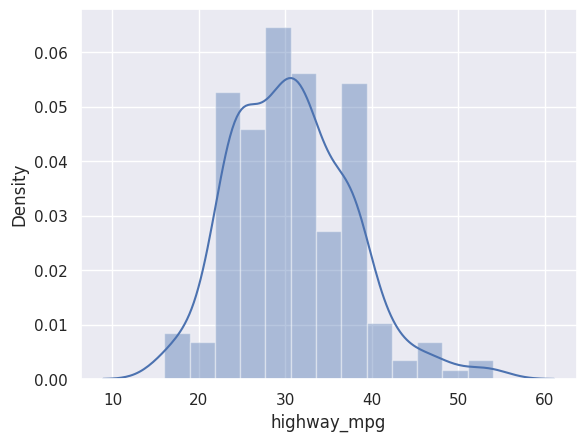

In [4]:
sns.distplot(auto['highway_mpg']);

/tmp/ipykernel_261867/374526762.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto['city_mpg'], kde=False, rug=True);


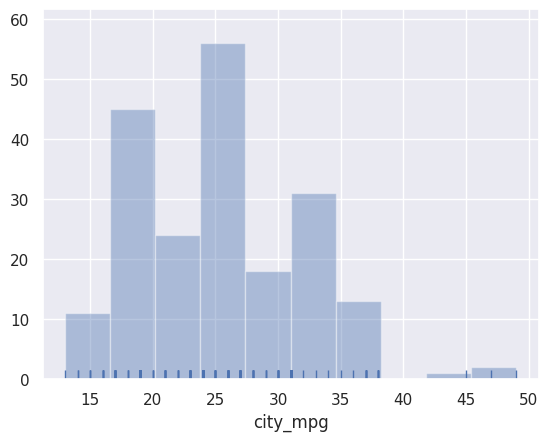

In [5]:
# we can turn the kde off and put a tic mark along the x-axis for every data point with rug
sns.distplot(auto['city_mpg'], kde=False, rug=True);

## Plotting bivariate distributions

It can also be useful to visualize a relationship between two variables. The easiest way to do this in seaborn is to use the jointplot() function, which creates a scatterplot of the two variables along with the histograms of each next to the appropriate axes.



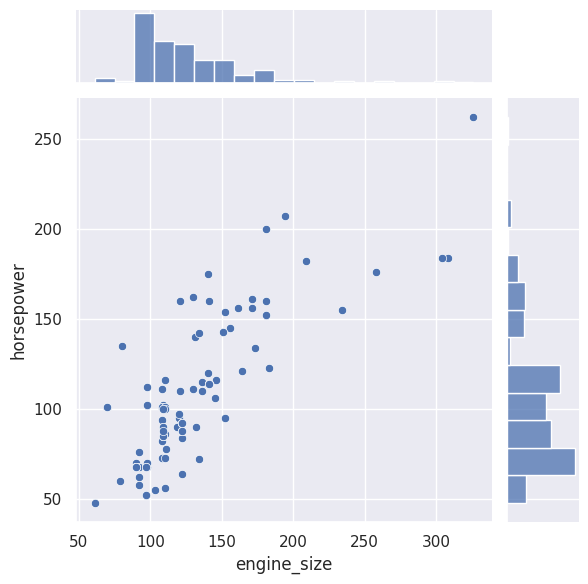

In [11]:
sns.jointplot(data=auto,x = 'engine_size', y = 'horsepower');

### Hex Bin Plots

We can make a hex bin plot that breaks the 2D area into hexagons and the number of points in each hexagon determines the color

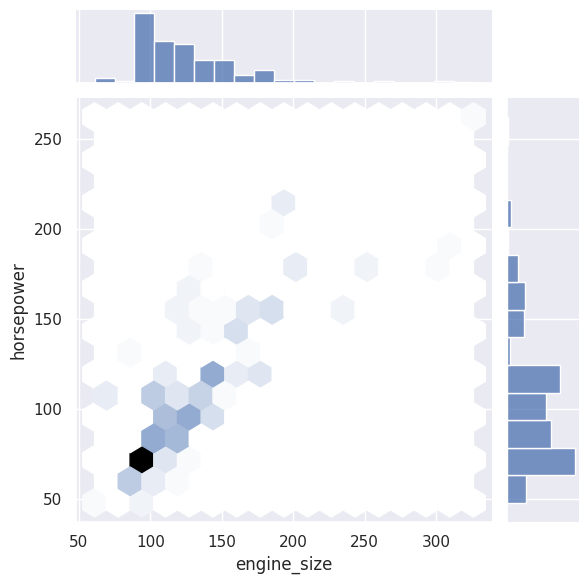

In [18]:
sns.jointplot(auto, x='engine_size', y='horsepower', kind="hex");

### Kernel Density Estimation

We can make a 2D estimation of the density also

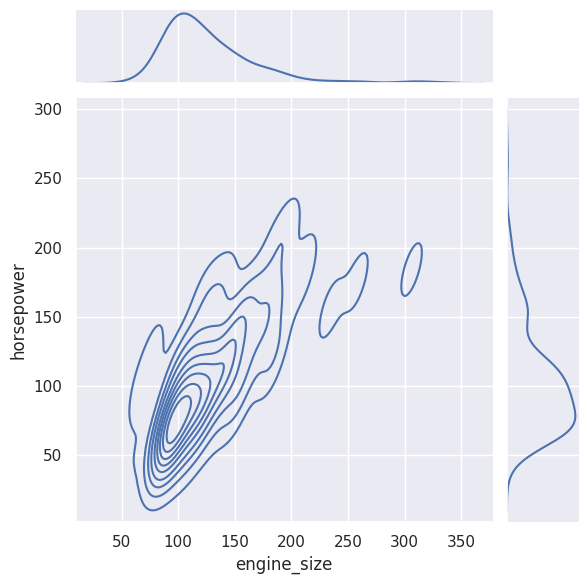

In [20]:
sns.jointplot(auto, x = 'engine_size', y='horsepower', kind="kde");

## Visualizing pairwise relationships in a dataset

To plot multiple pairwise scatterplots in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame, it also draws the histogram of each variable on the diagonal Axes:

Be careful about toggle scrolling in the cell menu!!!

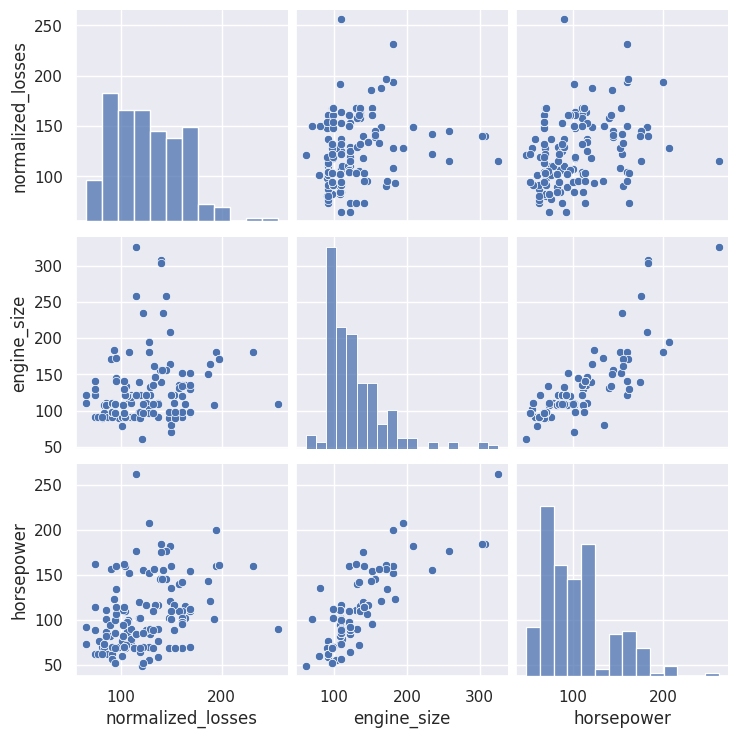

In [9]:
sns.pairplot(auto[['normalized_losses', 'engine_size', 'horsepower']]);

## Plotting with categorical data



In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using “jitter"

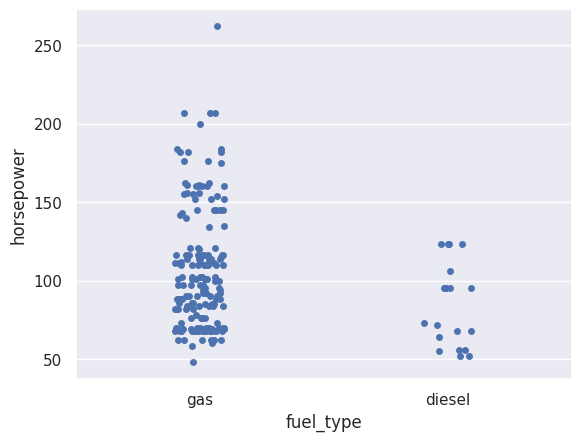

In [13]:
sns.stripplot(data  = auto, x= 'fuel_type', y ='horsepower', jitter=True);

A different approach would be to use the function swarmplot(), which positions each scatterplot point on the categorical axis and avoids overlapping points:

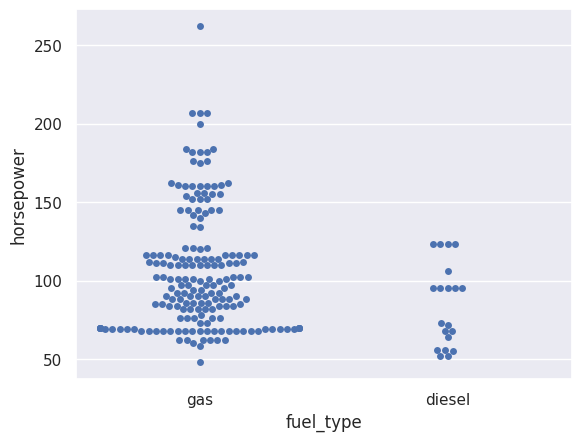

In [4]:
sns.swarmplot(auto , x= 'fuel_type', y='horsepower');

## Boxplots

Another common graph is a boxplot(). This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. 

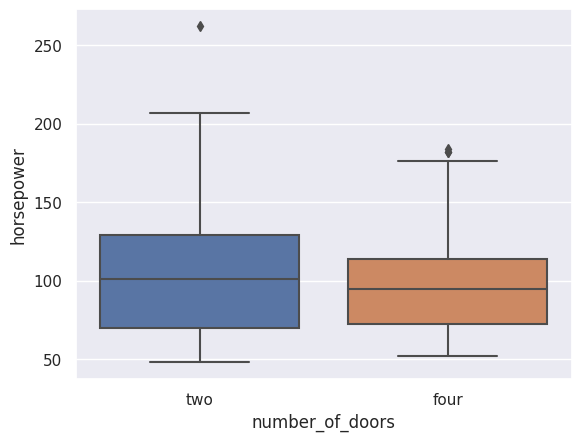

In [5]:
sns.boxplot(auto,x='number_of_doors', y='horsepower');

In [ ]:
sns.boxplot(auto['number_of_doors'], auto['horsepower'], hue=auto['fuel_type']);

## Bar plots

We can plot the mean of a a dataset, separated in categories using the barplot() function. When there are multiple observations in each category, it uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

Bar plots start at 0, which can sometimes be practical if zero is a number you want to compare to

In [ ]:
sns.barplot(auto['body_style'], auto['horsepower'], hue=auto['fuel_type']);

A special case for the bar plot is when you want to show the number of observations in each category rather than computing the mean of a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

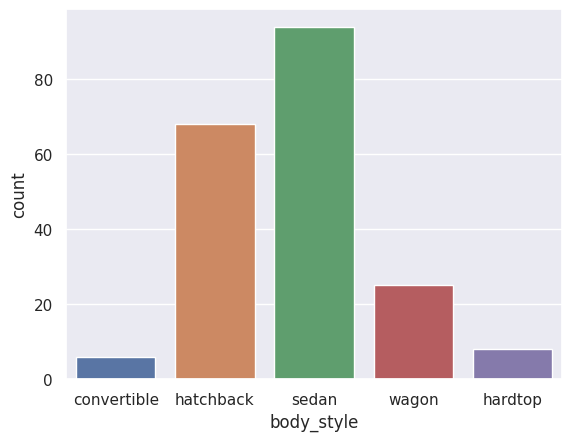

In [9]:
sns.countplot(auto,x='body_style');

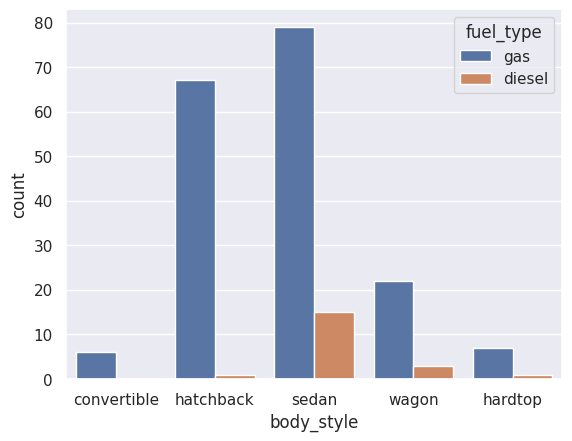

In [8]:
sns.countplot(auto,x='body_style',hue=auto['fuel_type']);

## Point plots

An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. Additionally, pointplot connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes:

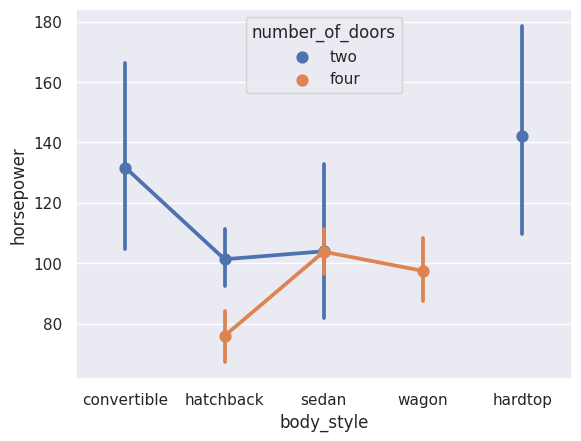

In [11]:
sns.pointplot(auto,x='body_style', y='horsepower', hue=auto['number_of_doors']);

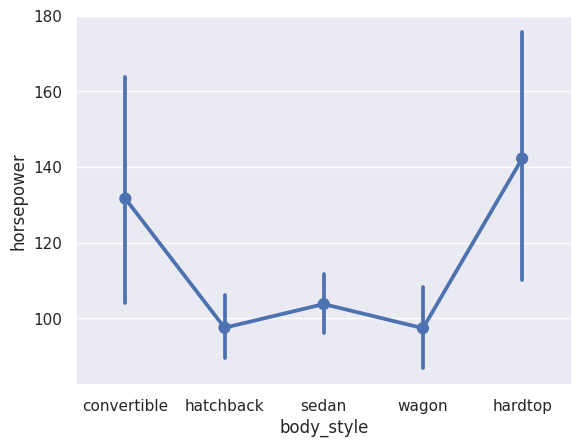

In [12]:
sns.pointplot(auto,x='body_style', y='horsepower');

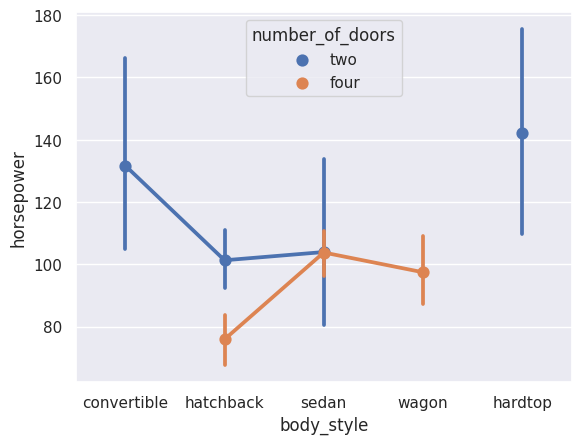

In [13]:
sns.pointplot(auto,x='body_style', y='horsepower', hue='number_of_doors');

## Drawing multi-panel categorical plots

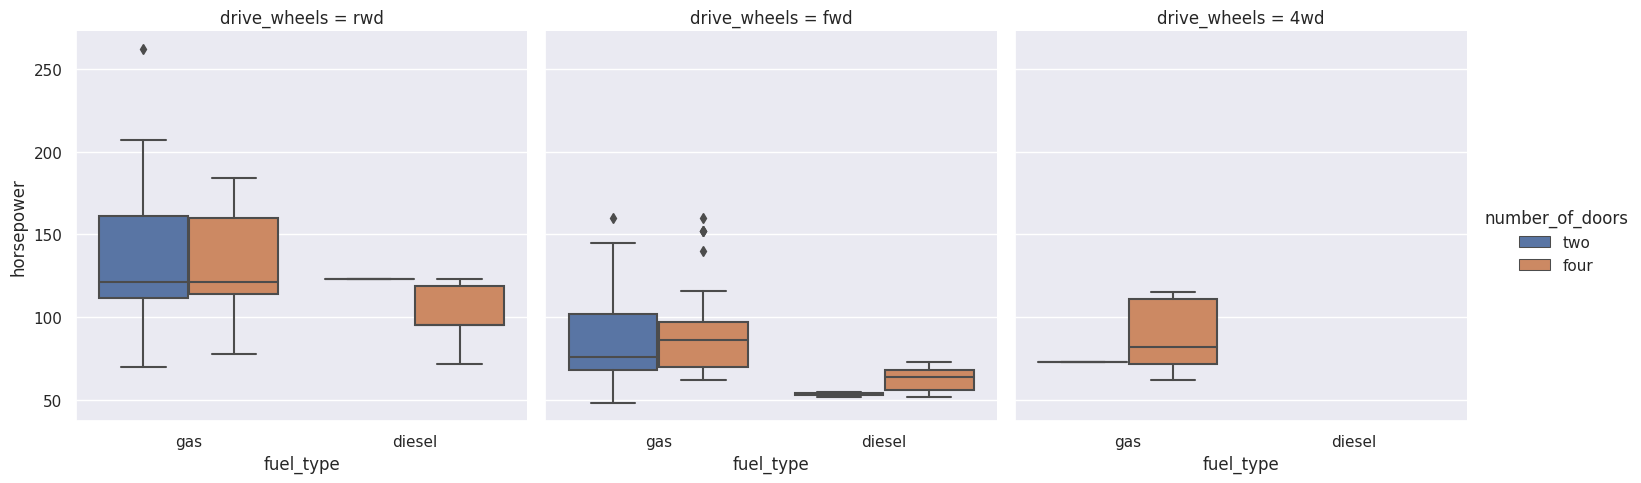

In [14]:
sns.catplot(x="fuel_type",
               y = "horsepower",
               hue="number_of_doors", 
               col="drive_wheels", 
               data=auto, 
               kind="box");


Various types of kind input : {``point``, ``bar``, ``count``, ``box``, ``violin``, ``strip``}

## Function to draw linear regression models

lmplot() is one of the most widely used function to quickly plot the Linear Relationship between 2 variables

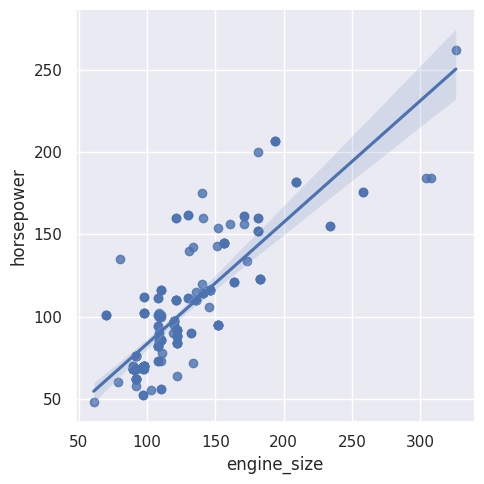

In [15]:
sns.lmplot(y="horsepower", x="engine_size", data=auto);

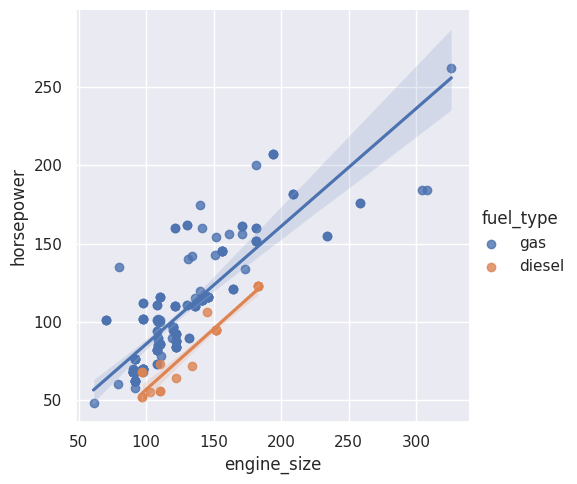

In [16]:
sns.lmplot(y="horsepower", x="engine_size",hue="fuel_type", data=auto);

In [67]:
var1,var2 = [100,140]
print(var1,var2)

100 140
